In [1]:
"""Compare O-H bond-length distribution between LAMMPS, MCCCS-MN-flex, and MCCCS-MN."""
import matplotlib
import matplotlib.pyplot as plt

import os
import shutil

import matplotlib.gridspec as gridspec
import matplotlib.ticker as mtick
import numpy as np
from matplotlib import rc
from matplotlib.ticker import (
    FormatStrFormatter,
    MaxNLocator,
    MultipleLocator,
    NullFormatter,
    ScalarFormatter,
    StrMethodFormatter,
)

In [2]:
plt.rcParams["font.family"] = "times" # "helvetica"
plt.rcParams['axes.autolimit_mode'] = 'round_numbers'


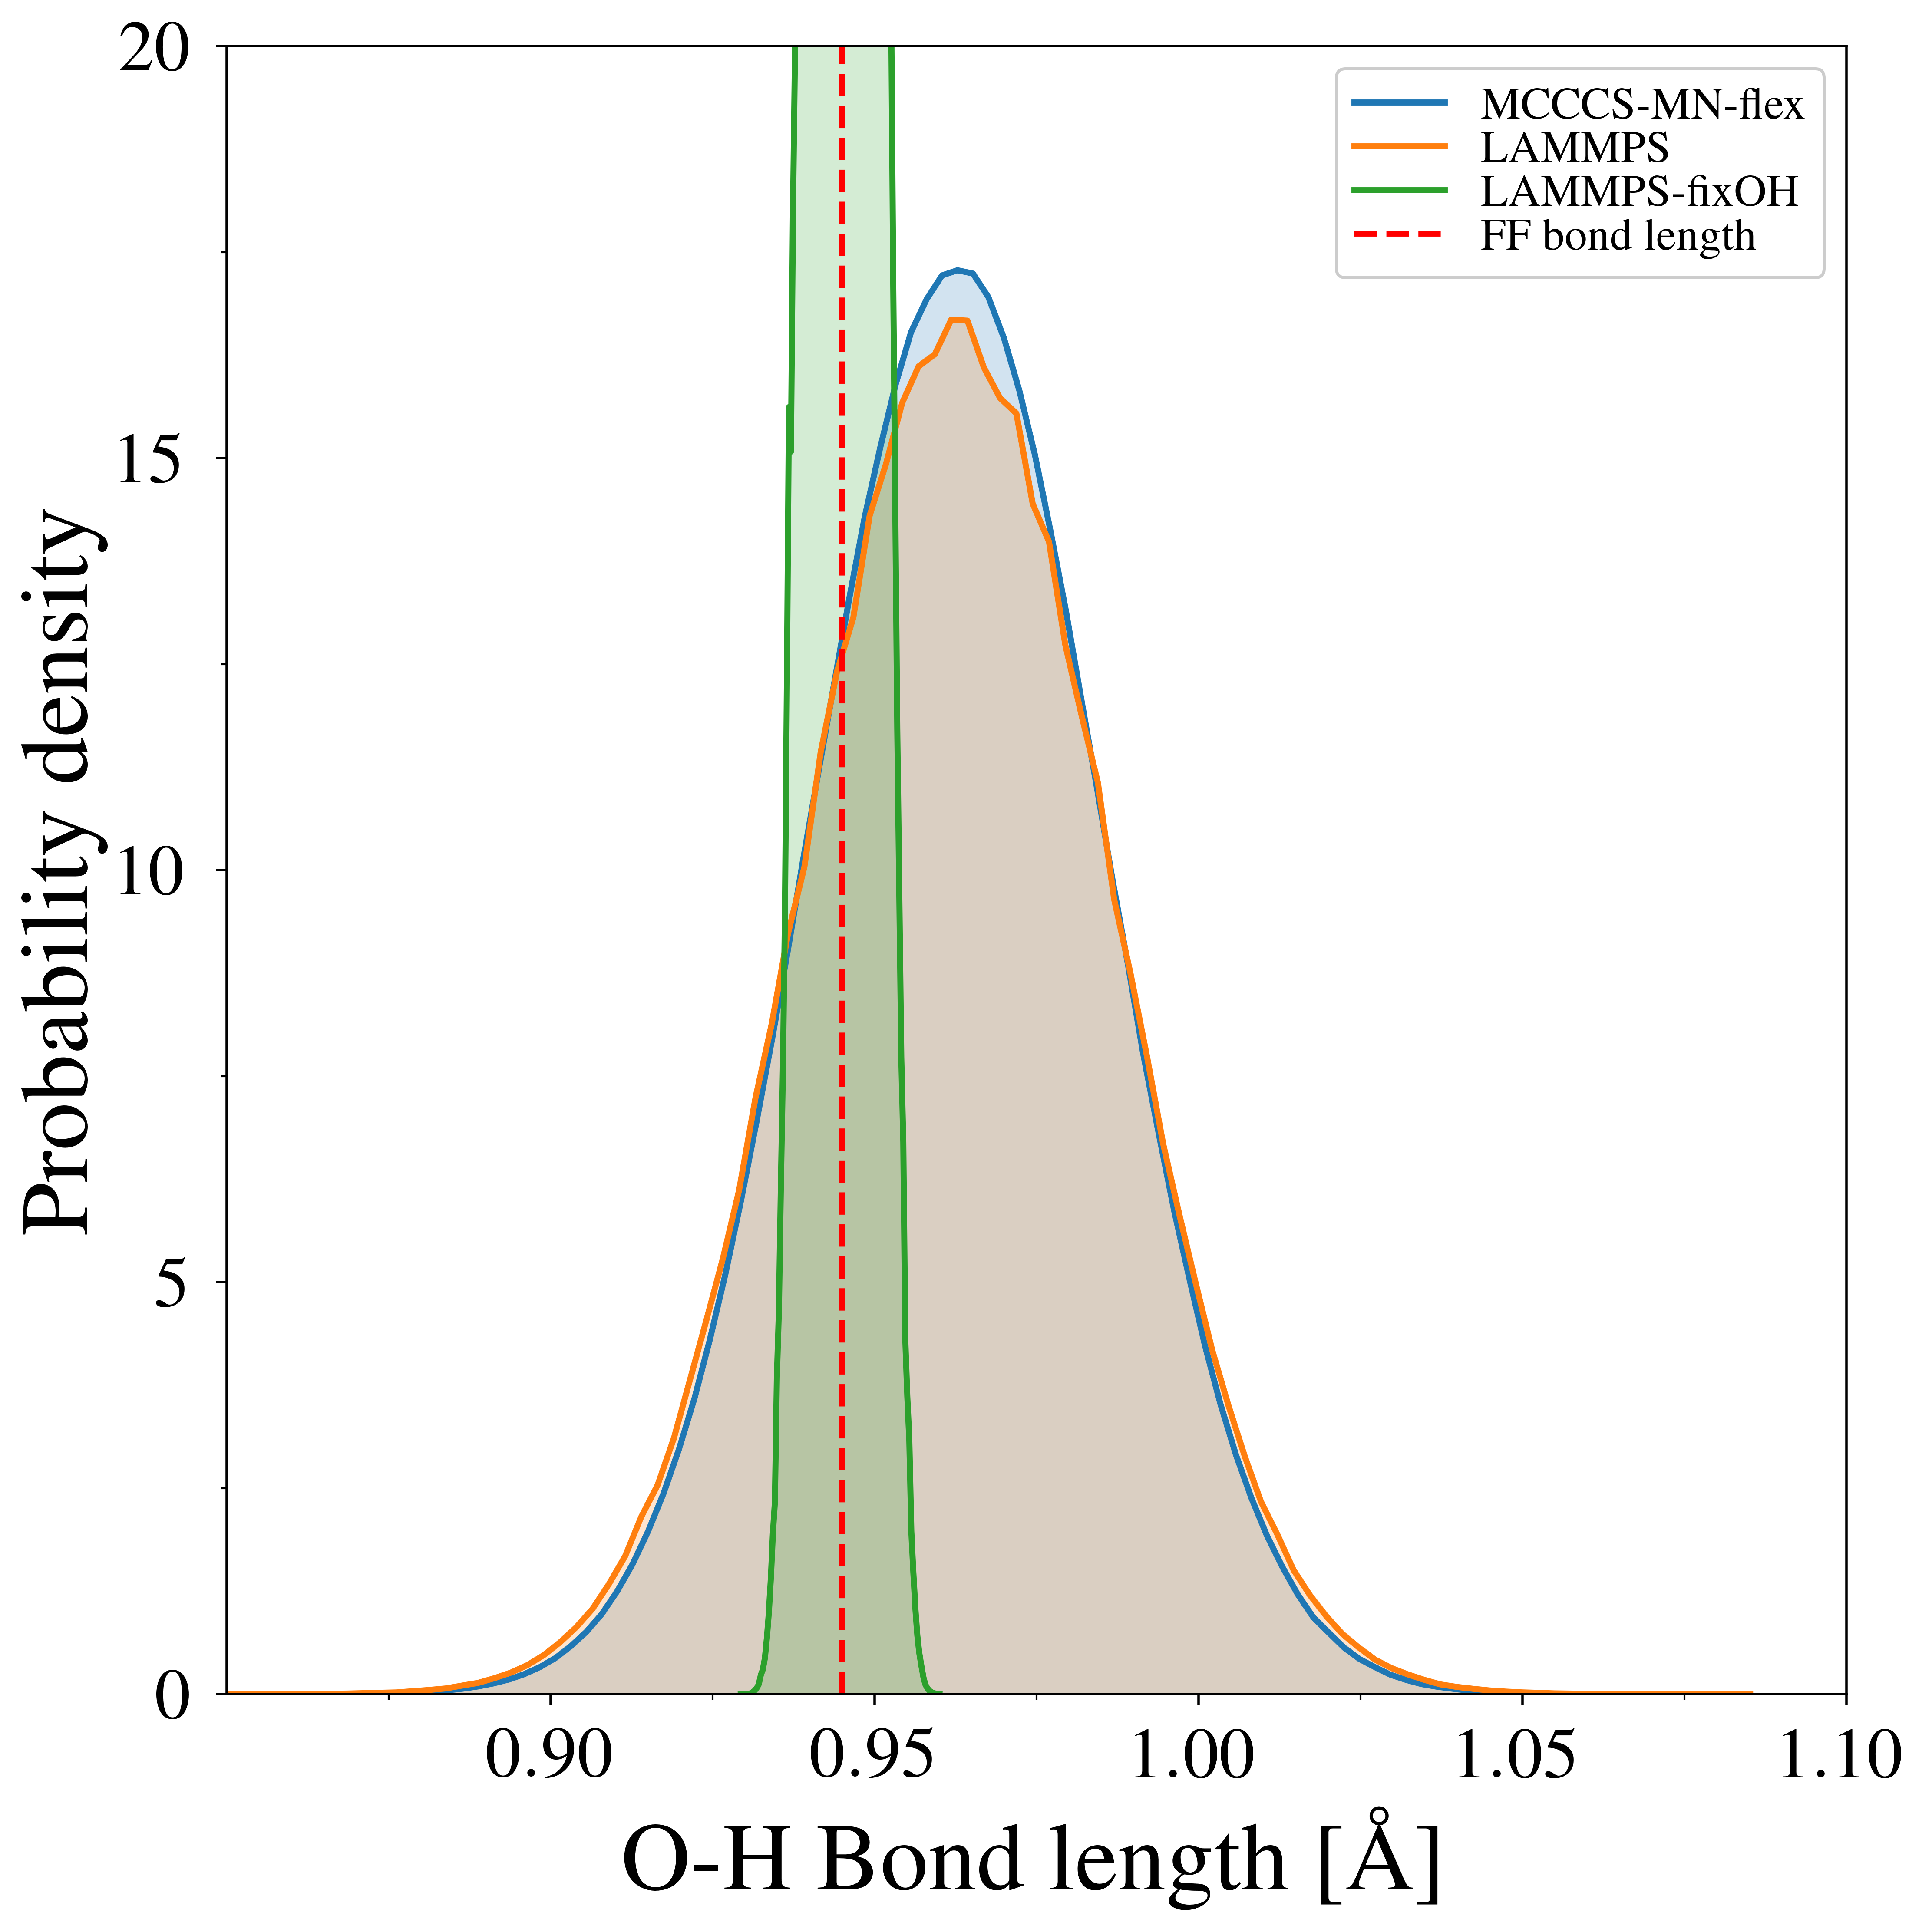

In [7]:
# # plot settings
# ms = 8  # markersize
# xtickfs = 11  # xtickfontsize
# xlabelfs = 14  # xlabelfontsize
# ylabelfs = 14  # ylabelfontsize
# ytickfs = 11  # ytickfontsize
# titlefs = 14  # title size
# legendfs = 9
alpha = 0.2

mcccs_fix = "bl_analysis_data/mcccs_ethanolAA_NPT-fixOH_280.0K_101.325kPa_cutoff_hard_lrc_energy_pressure/O_H_hist.txt"
mcccs_flex = "bl_analysis_data/mcccs_ethanolAA_NPT-flexOH_280.0K_101.325kPa_cutoff_hard_lrc_energy_pressure/O_H_hist.txt"
lammps_fix = "bl_analysis_data/lammps-VU_ethanolAA_NPT-fixOH_280.0K_101.325kPa_cutoff_hard_lrc_energy_pressure/O_H_hist.txt"
lammps_flex = "bl_analysis_data/lammps-VU_ethanolAA_NPT-flexOH_280.0K_101.325kPa_cutoff_hard_lrc_energy_pressure/O_H_hist.txt"

mcccs_fix_data = np.genfromtxt(mcccs_fix)
mcccs_flex_data = np.genfromtxt(mcccs_flex)
lammps_fix_data = np.genfromtxt(lammps_fix)
lammps_flex_data = np.genfromtxt(lammps_flex)


fig, axs = plt.subplots(1, 1, sharex=False, sharey=False, figsize=(9, 9))
ax1 = axs

plt.plot(mcccs_flex_data[:, 0], mcccs_flex_data[:, 1], label="MCCCS-MN-flex")
plt.plot(lammps_flex_data[:, 0], lammps_flex_data[:, 1], label="LAMMPS")
plt.plot(lammps_fix_data[:, 0], lammps_fix_data[:, 1], label="LAMMPS-fixOH")
plt.ylim([0, 20])
plt.xlabel("O-H Bond length" + r" [$\mathrm{\AA}$]")

plt.ylabel("Probability density")
# plt.xticks(fontsize=xtickfs)
# plt.yticks(fontsize=ytickfs)
plt.tight_layout()
plt.fill_between(mcccs_flex_data[:, 0], mcccs_flex_data[:, 1], alpha=alpha)
plt.fill_between(lammps_flex_data[:, 0], lammps_flex_data[:, 1], alpha=alpha)
plt.fill_between(lammps_fix_data[:, 0], lammps_fix_data[:, 1], alpha=alpha)
plt.axvline(
    0.945,
    ls="--",
    color="r",
    label="FF bond length",
)


ax1.legend(
    frameon=True,
    loc="upper right",
    ncol=1,
    # fontsize=legendfs,
    labelspacing=0.05,
)

# axes limits

ax1.set_xlim([0.8500001, 1.1])
ax1.set_ylim([0, 20])

ax1.yaxis.set_major_locator(plt.MaxNLocator(4))

# adjusting ticks

for ax in [ax1]:
    ax.xaxis.set_minor_locator(matplotlib.ticker.AutoMinorLocator(2))
    ax.yaxis.set_minor_locator(matplotlib.ticker.AutoMinorLocator(2))


fig.tight_layout()
plt.savefig("comp.pdf", dpi=900)
